In [ ]:
# Justin McClain
# Basic Agent behavior simulation with Mesa
# Agent curiosity grows each turn (step)
# Ministry Agents Brainwash those that are too curious
# If a Ministry Agent tries to brainwash another Ministry Agent, they could die in the struggle


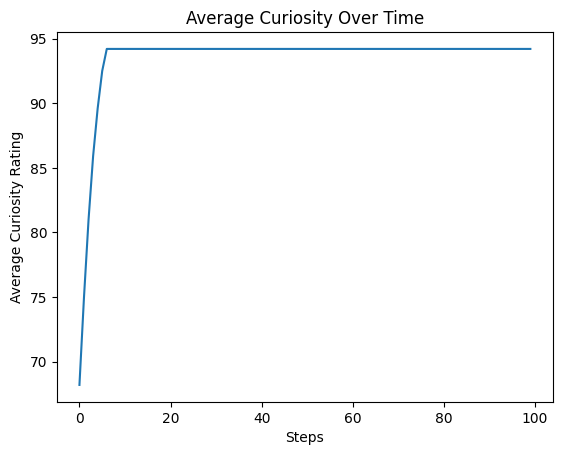

In [4]:
import random
from mesa import Model, Agent
from mesa.time import RandomActivation
import matplotlib.pyplot as plt

class Citizen(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.curiosity_rating = random.randint(20, 100)
        self.isMinistryOfTruth = True if random.random() < 0.01 else False

    def brainwash(self):
        if self.isMinistryOfTruth:
            for agent in self.model.schedule.agents:
                #if agents are too curious, the ministry wants them reset!
                if agent.curiosity_rating > 60:
                    agent.curiosity_rating -= 30

                    #if a ministry of truth agent gets too nosy, he could die!
                    if agent.isMinistryOfTruth:  # Check if the target agent is also a MinistryOfTruth agent
                        if random.random() < 0.01:  # For instance, 1% chance the MinistryOfTruth agent dies
                            self.model.schedule.remove(self)
                            break
                            
    def step(self):
        #Added Action Selector to raise curiosity each step
        #not to exceed 100
        if self.curiosity_rating < 90:
            self.curiosity_rating += 10

        #Brainwash action selector
        self.brainwash()

class BrainwashModel(Model):
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        for i in range(self.num_agents):
            a = Citizen(i, self)
            self.schedule.add(a)

    def step(self):
        self.schedule.step()

# create 100 agents!
N = 100
model = BrainwashModel(N)
curiosity_over_time = []

# we want 100 steps to represent 100 years of fighting the Ministry's oppression!
for i in range(100): # 100 steps
    model.step()
    avg_curiosity = sum([a.curiosity_rating for a in model.schedule.agents])/N
    curiosity_over_time.append(avg_curiosity)

plt.plot(curiosity_over_time)
plt.xlabel("Steps")
plt.ylabel("Average Curiosity Rating")
plt.title("Average Curiosity Over Time")
plt.show()
